# TCR INNOVATION FINAL PROJECT
NAME - PALKESH PRAJAPATI

ROLLNO -TCRIB3R137

# Problem statament  
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') .

# Attributes Involved in the dataset
Input variables:

1.	 Age (numeric)
2.	 Job : type of job (categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	Education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	Default: has credit in default? (categorical: 'no','yes','unknown')
6.	Housing: has housing loan? (categorical: 'no','yes','unknown')
7.	Loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:
8.	Contact: contact communication type (categorical: 'cellular','telephone')
9.	Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the
12.	Output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
    Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark
    purposes and should be discarded if the intention is to have a realistic predictive model.
 
other attributes:
13.	Campaign: number of contacts performed during this campaign and for this client (numeric, includes,last contact)
14.	pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client     was not previously contacted)
15.	previous: number of contacts performed before this campaign and for this client (numeric)
16.	poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17.	social and economic context attributes
18.	emp.var.rate: employment variation rate - quarterly indicator (numeric)
19.	cons.price.idx: consumer price index - monthly indicator (numeric)
20.	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
21.	nr.employed: number of employees - quarterly indicator (numeric)
22.	Has the client subscribed to a term deposit? (binary: 'yes','no') – Target Variable




1)First we are importing the necessary files that are required for our model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
import category_encoders as ce
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

2)Now we are import our bank dataset from our computer and converting the file into DataFrame 

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\bank.csv",sep=";")
df.rename(columns={'y':'target'},inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

 Columns of the dataset


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

3) Now we are checking whether there is any null value in any of the data of column

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

4) Now we are designing a function which will print all the necessary information of our datasets

In [7]:
def dataset_info(df):
    if isinstance(df,pd.DataFrame):
        is_na=df.isna().sum().sum()
        print("Datatype shape =",df.shape)
        print("any null values =",is_na,"\n")
        col=df.columns
        datatype=df.dtypes
        uniq=df.nunique()
        print("\033[1m","S.NO "," column","  datatype","uniquedata","\n")
        for i in range(len(df.columns)):
            print("%d %10s %10s %10s" %(i+1,col[i],datatype[i],uniq[i]))
      
                       
                       
            
    

In [8]:
dataset_info(df)

Datatype shape = (45211, 17)
any null values = 0 

 S.NO   column   datatype uniquedata 

1        age      int64         77
2        job     object         12
3    marital     object          3
4  education     object          4
5    default     object          2
6    balance      int64       7168
7    housing     object          2
8       loan     object          2
9    contact     object          3
10        day      int64         31
11      month     object         12
12   duration      int64       1573
13   campaign      int64         48
14      pdays      int64        559
15   previous      int64         41
16   poutcome     object          4
17     target     object          2


In [9]:
catagorical_data=[j for j in df.columns if df[j].dtype=="O"]
print("keys with catagorical dataset are : ","\033[1m" ,catagorical_data)
num=[k for k in df.columns if df[k].dtype!="O"]
print("\033[0m", "keys with numerical dataset are :""\033[1m",num)
    

keys with catagorical dataset are :   ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']
 keys with numerical dataset are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# EDA of attributes
1)AGE 

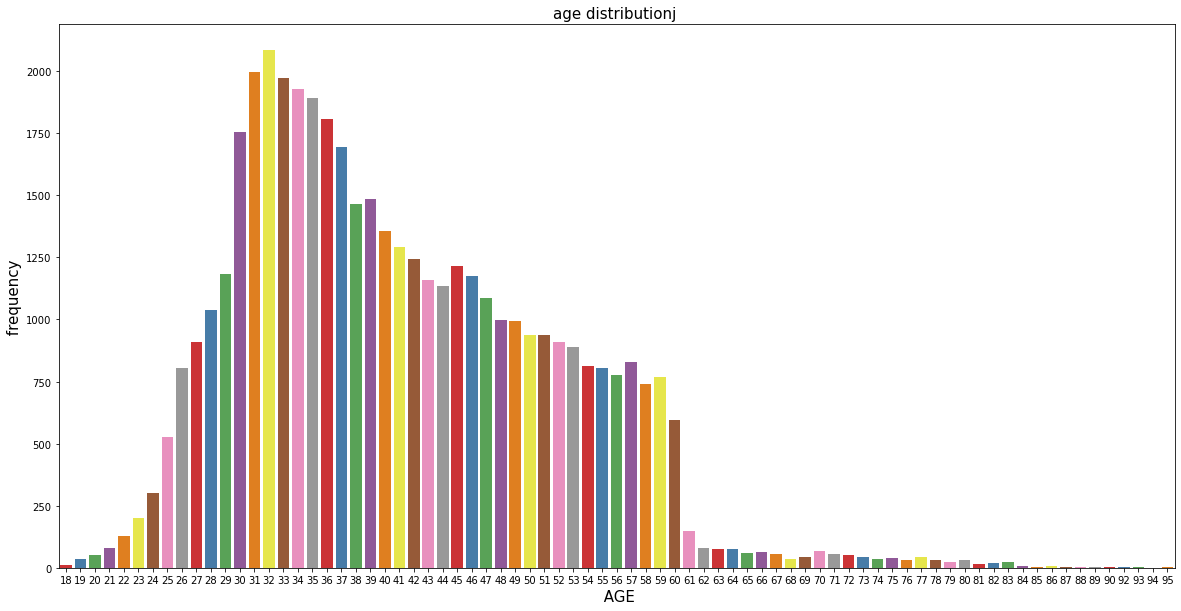

In [10]:
import seaborn as sns
plot=plt.subplots(figsize=(20,10))
sns.countplot(x='age',data=df ,palette="Set1")
plt.title("age distributionj ",fontsize=15)
plt.xlabel(" AGE" ,fontsize=15)
plt.ylabel(" frequency ",fontsize=15)
plt.show()


<AxesSubplot:xlabel='age', ylabel='Frequency'>

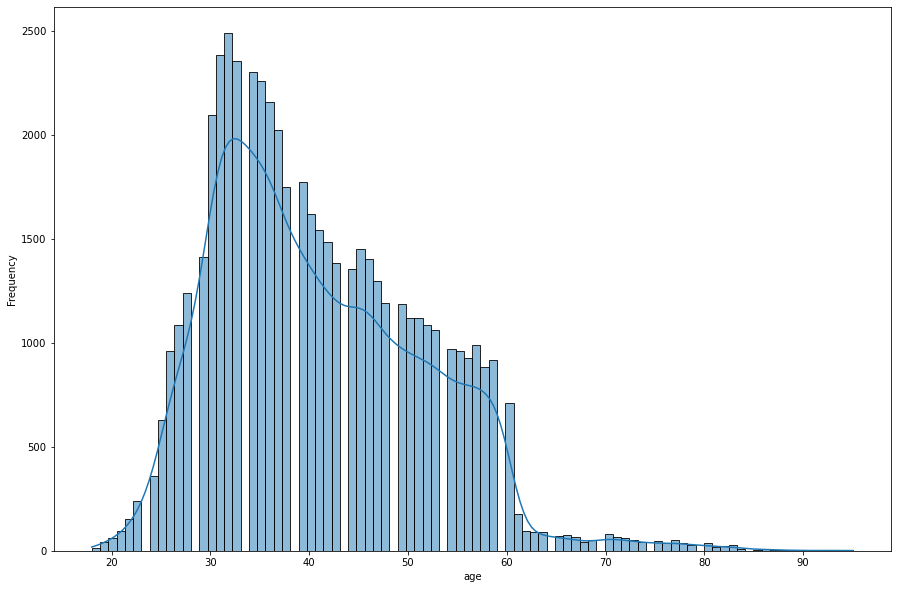

In [11]:
hist=plt.subplots(figsize=(15,10))
sns.histplot(data=df,x='age',stat='frequency',kde=True)

# II JOB


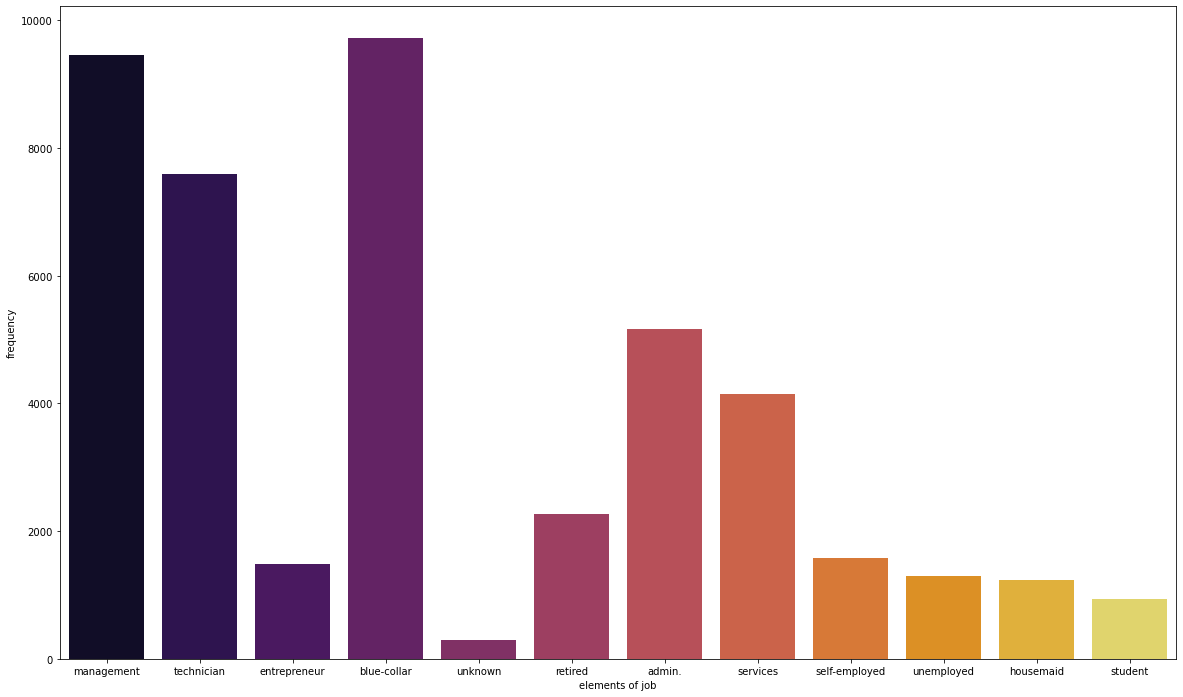

Counter({'blue-collar': 9732, 'management': 9458, 'technician': 7597, 'admin.': 5171, 'services': 4154, 'retired': 2264, 'self-employed': 1579, 'entrepreneur': 1487, 'unemployed': 1303, 'housemaid': 1240, 'student': 938, 'unknown': 288})


In [12]:
plt.figure(figsize=(20,12))
sns.countplot(x='job',data=df,palette='inferno')
plt.xlabel("elements of job")
plt.ylabel("frequency")
plt.show()
df['job'].unique()
print(Counter(df['job']))

# Marital

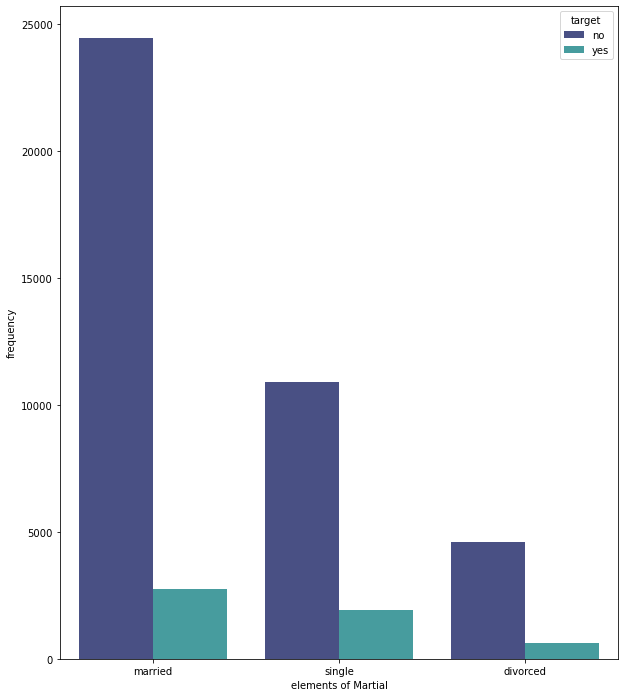

Counter({'married': 27214, 'single': 12790, 'divorced': 5207})

In [13]:
plt.figure(figsize=(10,12))
sns.countplot(x='marital' ,data=df,hue='target',palette='mako')
plt.xlabel("elements of Martial")
plt.ylabel("frequency")
plt.show()
df['marital'].unique()
z=Counter(df['marital'])
z

# Education

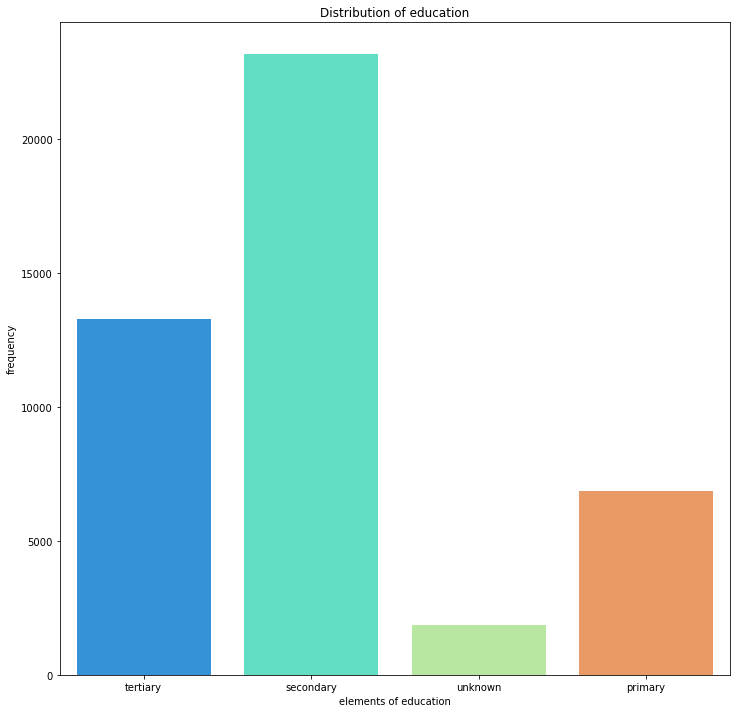

Counter({'secondary': 23202, 'tertiary': 13301, 'primary': 6851, 'unknown': 1857})


In [14]:
plt.figure(figsize=(12,12))
sns.countplot(x='education' ,data=df,palette='rainbow')
plt.title("Distribution of education")
plt.xlabel("elements of education")
plt.ylabel("frequency")
plt.show()
print(Counter(df['education']))

# Default

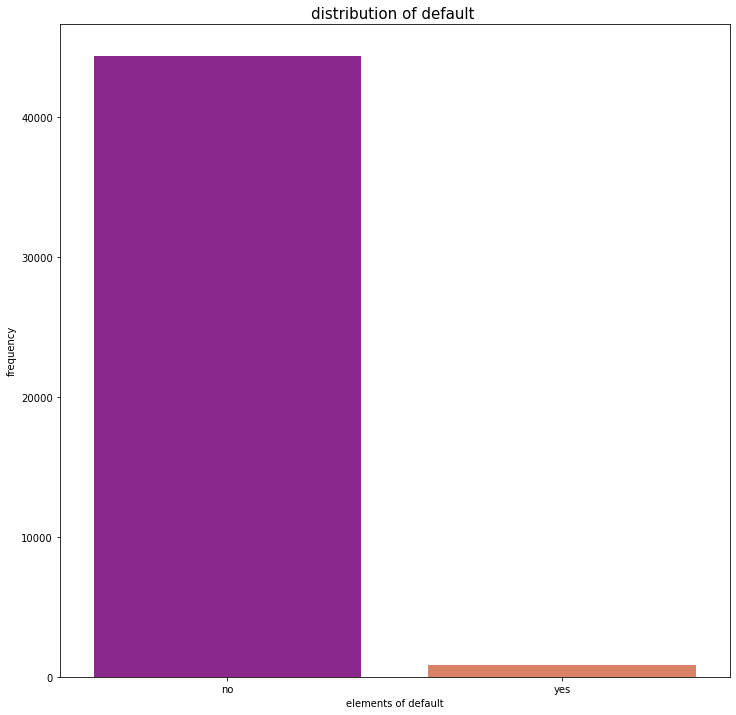

Counter({'no': 44396, 'yes': 815})

In [15]:
plt.figure(figsize=(12,12))
sns.countplot(x='default' ,data=df,palette='plasma')
plt.title("distribution of default ",fontsize=15)
plt.xlabel("elements of default")
plt.ylabel("frequency")
plt.show()

df['default'].unique()
z=Counter(df['default'])
z

# Housing

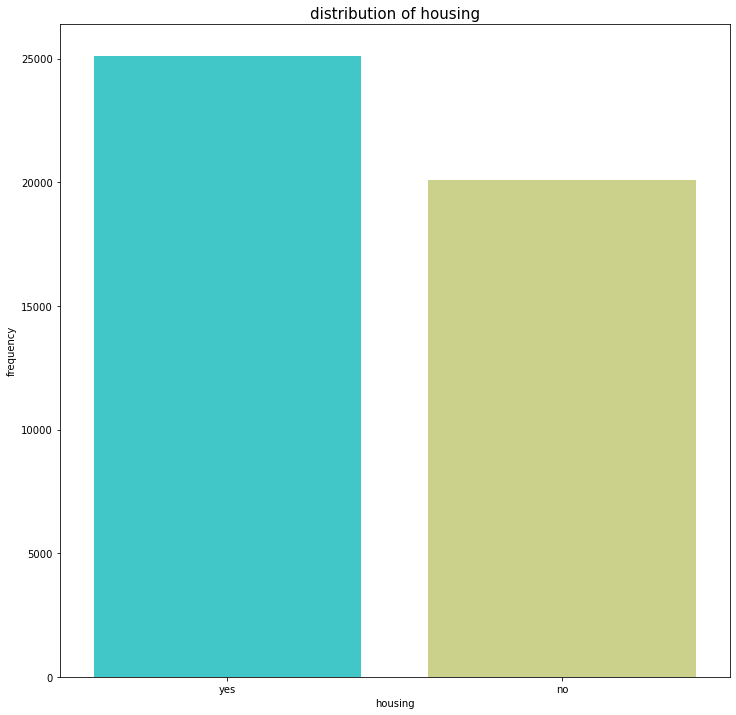

Counter({'yes': 25130, 'no': 20081})

In [16]:
plt.figure(figsize=(12,12))
sns.countplot(x='housing' ,data=df,palette='rainbow')
plt.xlabel("housing")
plt.ylabel("frequency")
plt.title("distribution of housing",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['housing'])
z


# Loan

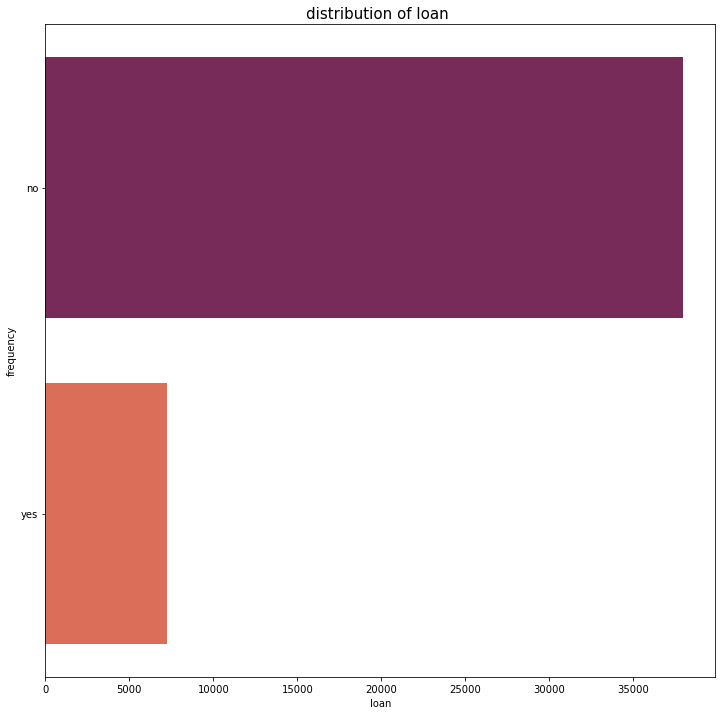

Counter({'no': 37967, 'yes': 7244})

In [17]:
plt.figure(figsize=(12,12))
sns.countplot(y='loan' ,data=df,palette='rocket')
plt.xlabel("loan")
plt.ylabel("frequency")
plt.title("distribution of loan ",fontsize=15)
plt.show()

df['loan'].unique()
z=Counter(df['loan'])
z


# Days

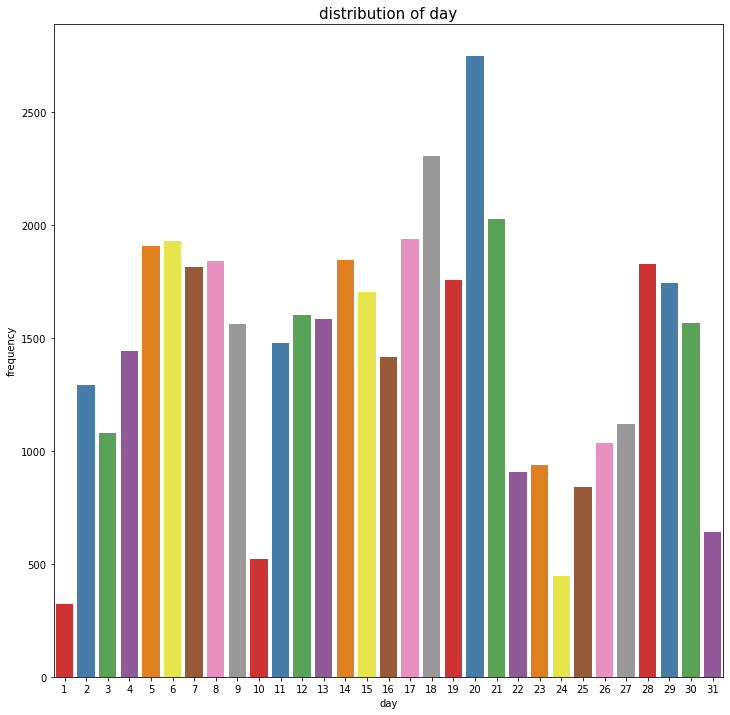

Counter({5: 1910,
         6: 1932,
         7: 1817,
         8: 1842,
         9: 1561,
         12: 1603,
         13: 1585,
         14: 1848,
         15: 1703,
         16: 1415,
         19: 1757,
         20: 2752,
         21: 2026,
         23: 939,
         26: 1035,
         27: 1121,
         28: 1830,
         29: 1745,
         30: 1566,
         2: 1293,
         3: 1079,
         4: 1445,
         11: 1479,
         17: 1939,
         18: 2308,
         24: 447,
         25: 840,
         1: 322,
         10: 524,
         22: 905,
         31: 643})

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(x='day' ,data=df,palette='Set1')
plt.xlabel("day")
plt.ylabel("frequency")
plt.title("distribution of day",fontsize=15)
plt.show()

df['day'].unique()
z=Counter(df['day'])
z


# Month

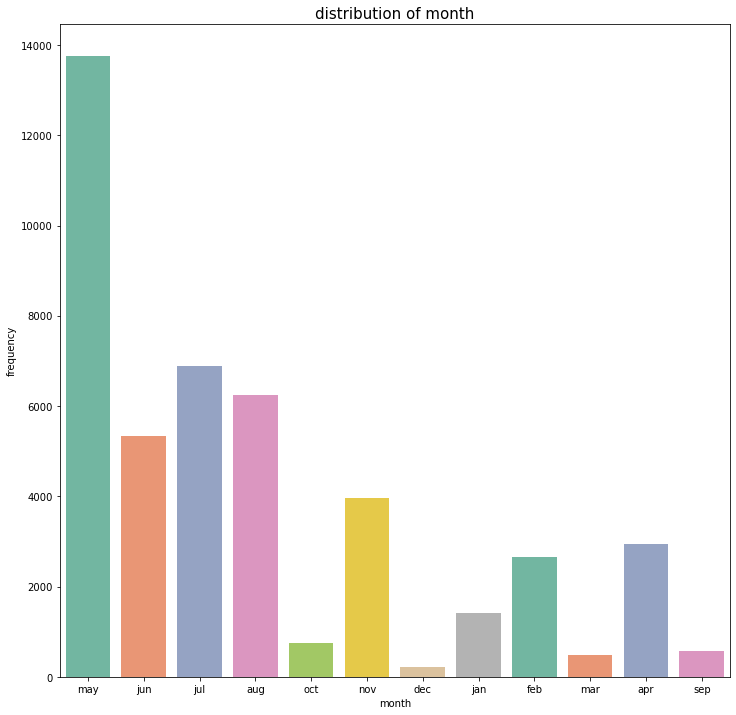

Counter({'may': 13766,
         'jun': 5341,
         'jul': 6895,
         'aug': 6247,
         'oct': 738,
         'nov': 3970,
         'dec': 214,
         'jan': 1403,
         'feb': 2649,
         'mar': 477,
         'apr': 2932,
         'sep': 579})

In [19]:
plt.figure(figsize=(12,12))
sns.countplot(x='month' ,data=df,palette='Set2')
plt.xlabel("month")
plt.ylabel("frequency")
plt.title("distribution of month",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['month'])
z


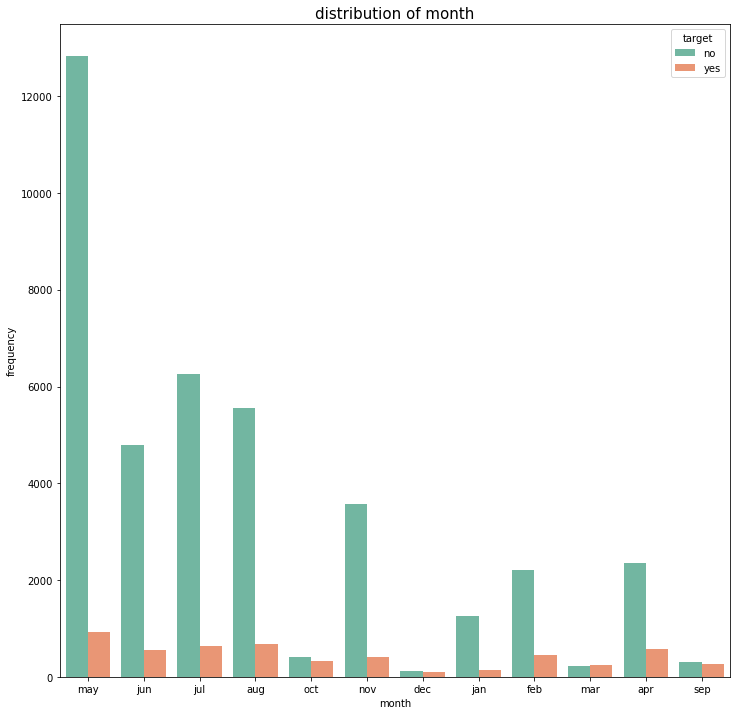

Counter({'may': 13766,
         'jun': 5341,
         'jul': 6895,
         'aug': 6247,
         'oct': 738,
         'nov': 3970,
         'dec': 214,
         'jan': 1403,
         'feb': 2649,
         'mar': 477,
         'apr': 2932,
         'sep': 579})

In [20]:
plt.figure(figsize=(12,12))
sns.countplot(x='month',data=df,hue='target',palette='Set2')
plt.xlabel("month")
plt.ylabel("frequency")
plt.title("distribution of month",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['month'])
z


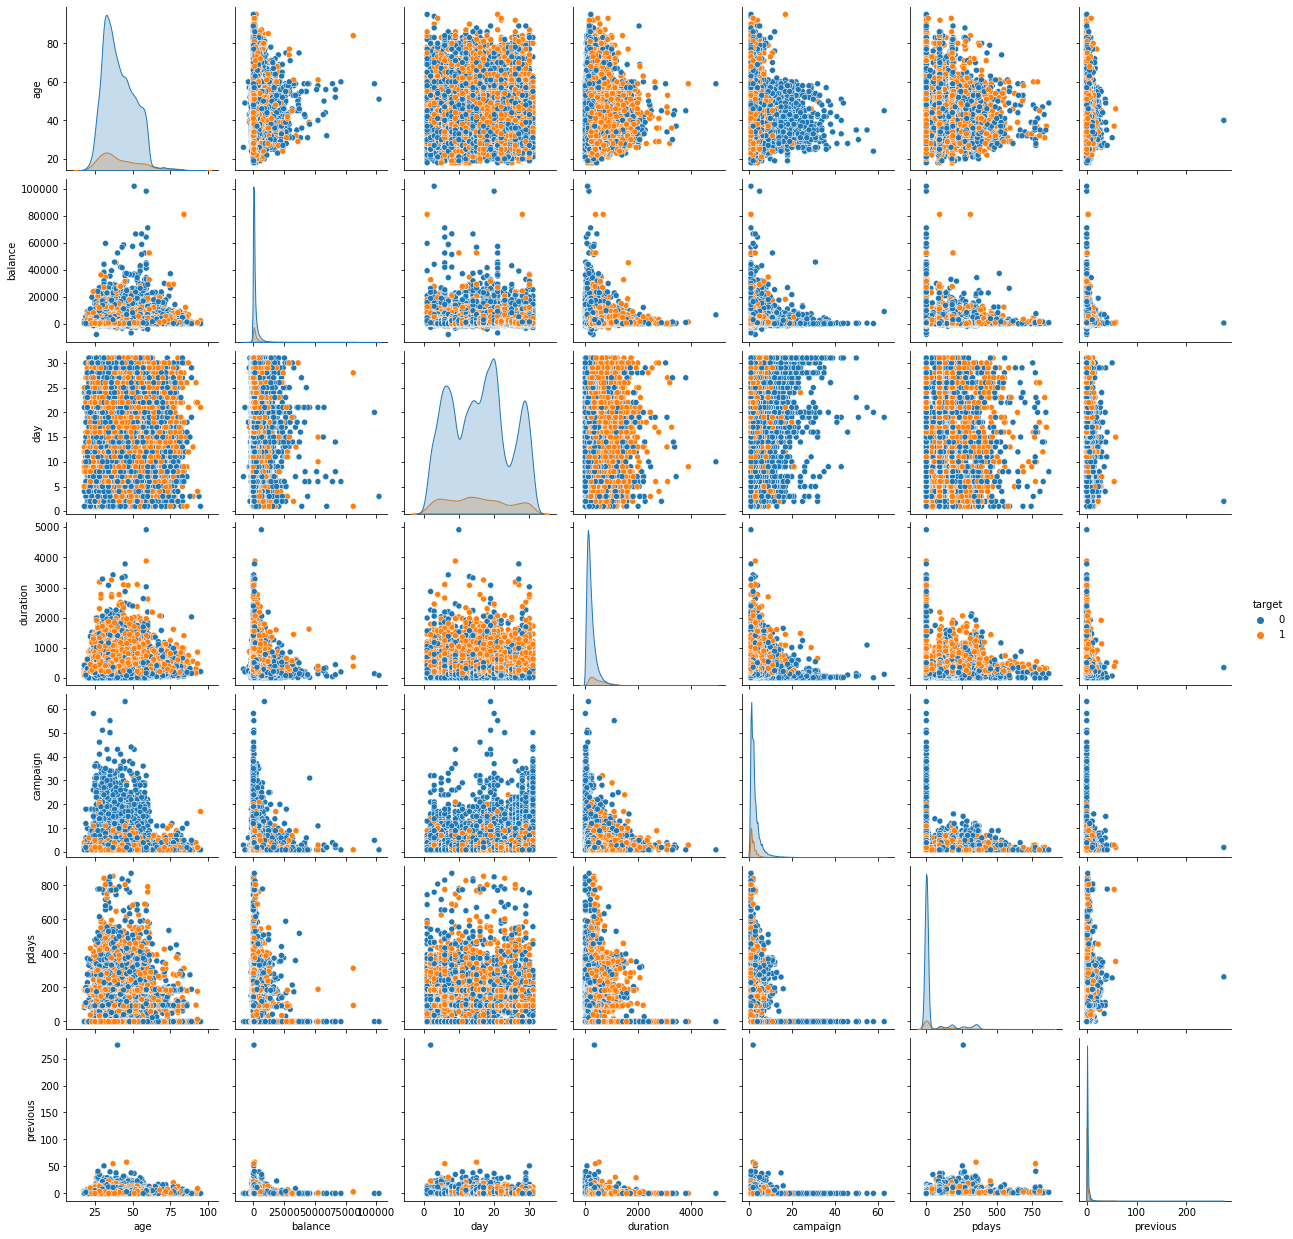

In [31]:
sns.pairplot(data=df,hue='target')

6) now after observing all the attributes now we divide our data into for training and testing

In [21]:
df['target']=df['target'].map({'no':0,'yes':1})
x=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

print("elements in X_train :",X_train.shape)
print("elements in  X_test :",X_test.shape)
print("elements in Y_train :",Y_train.shape)
print("elements in Y_test :",Y_test.shape)


elements in X_train : (36168, 16)
elements in  X_test : (9043, 16)
elements in Y_train : (36168,)
elements in Y_test : (9043,)


In [22]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
42874,76,retired,married,primary,no,2223,no,no,telephone,4,feb,429,1,-1,0,unknown
25438,36,management,single,tertiary,no,3343,no,no,cellular,18,nov,307,1,-1,0,unknown
35108,36,blue-collar,married,secondary,no,777,yes,no,cellular,6,may,185,3,-1,0,unknown
41818,40,self-employed,married,tertiary,no,13669,no,no,cellular,15,oct,138,1,136,8,other
20172,59,retired,married,tertiary,no,3843,no,no,cellular,11,aug,104,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30426,57,services,married,primary,no,-319,no,yes,cellular,5,feb,620,1,196,1,other
10330,49,blue-collar,married,primary,no,518,yes,no,unknown,12,jun,223,1,-1,0,unknown
29277,26,services,single,secondary,no,37,no,yes,cellular,2,feb,219,5,-1,0,unknown
14433,40,management,married,tertiary,no,0,no,no,cellular,14,jul,109,8,-1,0,unknown


As we can see there is categorcal dataset in our training model so first we have to convert it into numerical data for applying any algorithm

Now we have succesfully converted our categoricalc data into numerical data

In [23]:
encoder=ce.OrdinalEncoder(cols=['job','marital','education','default','housing','loan','contact','month','duration','poutcome'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)
X_train.keys


<bound method NDFrame.keys of        age  job  marital  education  default  balance  housing  loan  contact  \
42874   76    1        1          1        1     2223        1     1        1   
25438   36    2        2          2        1     3343        1     1        2   
35108   36    3        1          3        1      777        2     1        2   
41818   40    4        1          2        1    13669        1     1        2   
20172   59    1        1          2        1     3843        1     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
30426   57    6        1          1        1     -319        1     2        2   
10330   49    3        1          1        1      518        2     1        3   
29277   26    6        2          3        1       37        1     2        2   
14433   40    2        1          2        1        0        1     1        2   
33244   36    2        1          2        1      139        2     1        2  

# RANDOM FOREST ALGORITHM

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")



Accuracy score of Random forest Algorithm is 89.15183014486342 %
Confusion MAtrix :
 [[7834  143]
 [ 838  228]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7977
           1       0.61      0.21      0.32      1066

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043
 


# Now for better accuracy we have to check the contribution of each attribute in our model so that we can remove those attributes which are contributig less

In [25]:
f_score=pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=True)
f_score

default      0.001782
loan         0.010442
contact      0.020595
marital      0.022716
housing      0.023782
previous     0.025802
education    0.030257
campaign     0.041681
pdays        0.049742
job          0.054566
poutcome     0.074448
month        0.082605
day          0.100202
age          0.110977
balance      0.124870
duration     0.225534
dtype: float64

In [26]:
X_train.drop(columns=['default','loan'])
X_test.drop(columns=['default','loan'])
RF=RandomForestClassifier(n_estimators=1000)
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")


Accuracy score of Random forest Algorithm is 89.06336392790003 %
Confusion MAtrix :
 [[7824  153]
 [ 836  230]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7977
           1       0.60      0.22      0.32      1066

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043
 


Now for better accuracy of our model we are scaling the dataset in order to remove the outliers from the data

In [27]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
Sc.fit(X_train)
X_train=Sc.transform(X_train)
X_test=Sc.transform(X_test)
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")



Accuracy score of Random forest Algorithm is 88.98595598805706 %
Confusion MAtrix :
 [[7823  154]
 [ 842  224]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7977
           1       0.59      0.21      0.31      1066

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043
 


# KNN CLASSIFIER

In [28]:
from sklearn.neighbors import KNeighborsClassifier  
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
Y_predicted=KNN.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")


accuracy of the model is 87.60367134800399 


# LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_predicted=log.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 88.65420767444432 


Among all the algorithm that we have applied we are getting best accuracy for RANDOMFORESTCLASSIFIER model .
Thank You